# Dimensionality Reduction

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import ipyvolume.pylab as p3
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [42]:
# Create an instance of the PCA class
pca = PCA()

In [62]:
mpl.rcParams.update({'font.size':16})

# A function for plotting 3-dimensional data
def plot3d(data):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(*data.T)
    minn,maxx = data.min(),data.max()
    ax.set_xlim(minn,maxx)
    ax.set_ylim(minn,maxx)
    ax.set_zlim(minn,maxx)
    
def plot3d_live(data):
    fig = p3.figure(figsize=(8,8))
    q = p3.scatter(*data.T, size=1, marker="sphere")
    minn,maxx = data.min(),data.max()
    p3.xlim(minn,maxx)
    p3.ylim(minn,maxx)
    p3.zlim(minn,maxx)
    p3.style.use("dark") # looks better
    p3.show()
    
# A function for summarizing covariancs and correlations
def summarize(info,name,quiet=False):
    values = info[name]
    if not quiet:
        print(values.round(2))
    plt.pcolor(values,cmap='RdBu_r',vmin=-values.max(),vmax=values.max())
    raynge = np.arange(values.shape[0])
    if not quiet:
        plt.xticks(raynge+0.5,[chr(88+i) for i in raynge])
        plt.yticks(raynge+0.5,[chr(88+i) for i in raynge])
    else:
        plt.xticks([])
        plt.yticks([])
    plt.xlabel('Dimension')
    plt.xlabel('Dimension')
    plt.gca().invert_yaxis() # Make y-axis go from low to high like a matrix
    plt.colorbar().set_label(name)
    eigenvalues,_ = np.linalg.eig(info[name])
    if not quiet:
        for i,eig in enumerate(sorted(eigenvalues,reverse=True)):
            print('Eigenvalue #%d is %.3g' % (i+1,eig))
        
def report_mean_var(data):
    for i in range(data.shape[1]):
        column = data[:,i]
        print("Dimension %d has mean %.2g and variance %.3g" % \
              (i+1,column.mean(),column.var()))

## Generate and plot some random data

Dimension 1 has mean -0.68 and variance 19.5
Dimension 2 has mean -0.16 and variance 3.88
Dimension 3 has mean 0.049 and variance 0.868


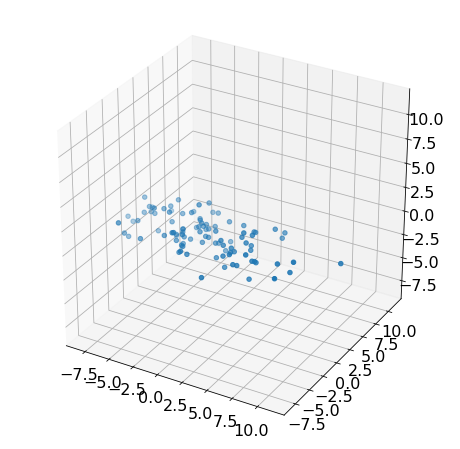

In [71]:
data = np.random.randn(100,3) # 100 data points, each with x, y, z values.  
data[:, 0] *= 4
data[:, 1] *= 2
plot3d(data)
report_mean_var(data)

### Interactive 3D plot

In [72]:
plot3d_live(data)

## These data points could be features of something we care about

In [79]:
df = pd.DataFrame(data, columns=['Hippocampal activation', 'Relative Age', 'Task accuracy'])
df.index.name = 'Person #'
df.head()

,Hippocampal activation,Relative Age,Task accuracy
Person #,,,
0,-7.021730,-4.242166,1.525358
1,-7.575055,2.204993,-0.180656
2,-3.150330,0.204085,-0.538607
3,3.556687,-0.624091,1.737250
4,4.202798,-0.254068,1.495350


## This randomly generated data has uncorrelated features

[[ 1.   -0.21  0.07]
 [-0.21  1.   -0.02]
 [ 0.07 -0.02  1.  ]]
Eigenvalue #1 is 1.22
Eigenvalue #2 is 0.986
Eigenvalue #3 is 0.79


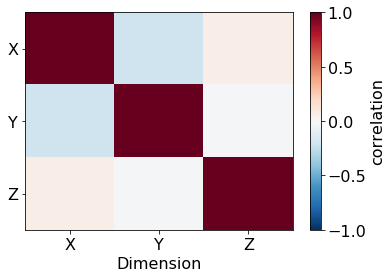

In [80]:
info['correlation'] = np.corrcoef(data.T)
summarize(info,'correlation')

## But some features carry more of the data's variance than others (x > y > z)

[[19.71 -1.8   0.29]
 [-1.8   3.92 -0.04]
 [ 0.29 -0.04  0.88]]
Eigenvalue #1 is 19.9
Eigenvalue #2 is 3.71
Eigenvalue #3 is 0.872


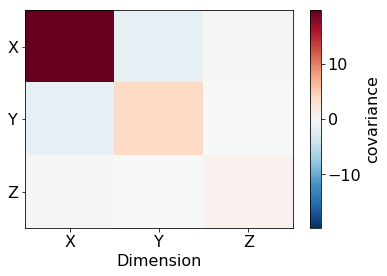

In [81]:
info = {}
info['covariance'] = np.cov(data.T)
summarize(info,'covariance')

## Create new data, this time with correlations between features

Dimension 1 has mean -0.68 and variance 19.5
Dimension 2 has mean -0.16 and variance 3.88
Dimension 3 has mean -0.59 and variance 9.91


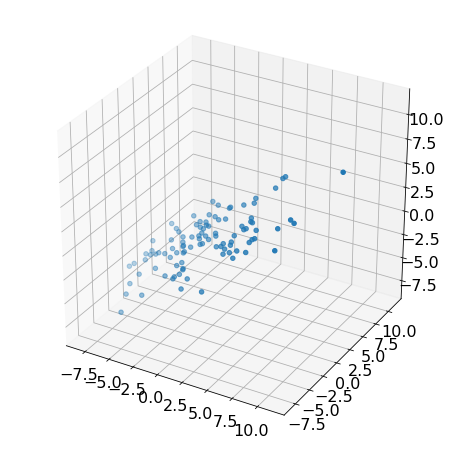

In [82]:
data[:,2] = (data[:,0] + data[:,1])/np.sqrt(2)
plot3d(data)
report_mean_var(data)

In [83]:
plot3d_live(data)

## The dataset now has non-zero covariance between features 

[[19.71 -1.8  12.66]
 [-1.8   3.92  1.49]
 [12.66  1.49 10.01]]
Eigenvalue #1 is 28.4
Eigenvalue #2 is 5.2
Eigenvalue #3 is 5.82e-15


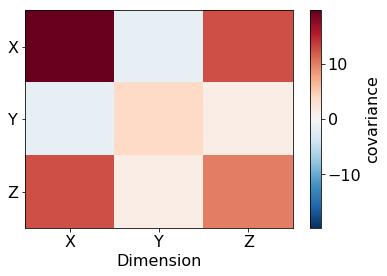

In [84]:
info['covariance'] = np.cov(data.T)
summarize(info,'covariance')

In [86]:
## Now let's find a better set of features 
### - This new set of features -- built from the old -- will reduce the dimensionality of the data

In [87]:
pca.fit(data);

In [88]:
### And let's rotate the cloud of data points until of the axes (new features) accounts for none of the variance

In [89]:
data_rotated = np.dot(pca.components_,data.T).T
report_mean_var(data_rotated)

Dimension 1 has mean -0.89 and variance 28.2
Dimension 2 has mean 0.21 and variance 5.15
Dimension 3 has mean -3.3e-16 and variance 3.12e-30


In [91]:
plot3d_live(data_rotated)

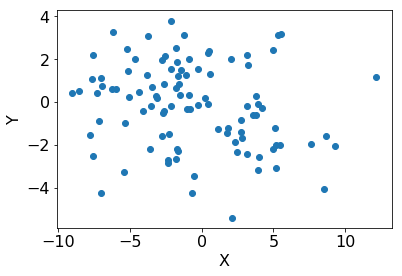

In [92]:
# Get rid of the z-axis
data_with_no_z = data[:,:2]
plt.scatter(*data_with_no_z.T);
plt.xlabel('X')
plt.ylabel('Y');

In [93]:
for i,value in enumerate(pca.explained_variance_ratio_):
    print("Dimension %d explains %.2g of the variance" % (i,value))

Dimension 0 explains 0.85 of the variance
Dimension 1 explains 0.15 of the variance
Dimension 2 explains 2.9e-32 of the variance
